In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [3]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

In [8]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

Exercise 1: Map the dates to seasons and drop the Date column

In [9]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define a function to map dates to seasons (for Australian context)
def date_to_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Apply the function to the 'Date' column
df['Season'] = df['Date'].apply(date_to_season)

# Drop the 'Date' column
df = df.drop(columns=['Date'])

df


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Season
64191,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80992,Watsonia,3.6,14.5,0.0,2.4,8.8,NNE,41.0,ENE,NNE,...,66.0,1028.4,1025.0,1.0,7.0,5.2,13.8,No,No,Winter
80994,Watsonia,4.8,13.3,0.4,0.6,0.0,NNW,24.0,NE,NNE,...,63.0,1028.5,1025.1,7.0,7.0,5.6,12.4,No,No,Winter
80995,Watsonia,5.6,13.1,0.0,1.6,6.0,NNW,52.0,NE,N,...,67.0,1019.0,1014.0,1.0,7.0,8.8,11.6,No,Yes,Winter
80996,Watsonia,6.9,12.1,3.2,1.8,5.6,SSW,24.0,WNW,SW,...,61.0,1018.7,1017.3,2.0,7.0,7.9,11.0,Yes,No,Winter


Exercise 2. Define the feature and target dataframes

In [13]:
X = df.drop(columns='RainTomorrow', axis=1)
y = df['RainTomorrow']
print(df.columns)



Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Season'],
      dtype='object')


Exercise 3. How balanced are the classes?

In [ ]:
# Assuming y is the target dataframe (e.g., y = df['RainTomorrow'])

# Display the count of each class
class_counts = y.value_counts()

# Show counts
print("Class counts:")
print(class_counts)

# Show normalized counts as percentages
class_percentages = y.value_counts(normalize=True) * 100
print("\nClass percentages:")
print(class_percentages)

Exercise 4. What can you conclude from these counts?

From the class counts and percentages in the rainfall dataset for Melbourne:

Rain frequency annually: It rains less frequently than it does not, e.g., if "No" class is around 75% and "Yes" (rain) is about 25%, it means it rains roughly 1 out of 4 days in a year.​

Accuracy by always assuming no rain: If you always predict "No Rain," your accuracy would be approximately equal to the majority class percentage (e.g., ~75%) since most days do not have rain. This strategy yields high accuracy superficially but ignores minority "rain" cases, leading to poor model performance on rain prediction.

Is the dataset balanced? No, this dataset is imbalanced as one class ("No Rain") dominates the other ("Rain") by a significant margin.

Next steps:

Use evaluation metrics beyond accuracy, such as precision, recall, F1-score, and confusion matrix to judge model performance.

Apply techniques to handle imbalanced data, such as resampling (oversampling minority or undersampling majority), or use model algorithms robust to imbalance (e.g., Random Forest, XGBoost).

Consider feature engineering or collecting more data on rain events to improve predictive power.

Further analyze false negative rates to ensure rain days are not missed by the model.

Exercise 5. Split data into training and test sets, ensuring target stratification
Complete the followng code:

X_train, X_test, y_train, y_test = train_test_split(..., ..., test_size=0.2, stratify=..., random_state=42)

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Example: Loading your dataset (replace with your actual data loading step)
# df = pd.read_csv('your_data.csv')

# Assuming 'RainTomorrow' is your target and rest are features
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Split data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Verify the split
print("Training target distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest target distribution:")
print(y_test.value_counts(normalize=True))



Training target distribution:
RainTomorrow
No     0.762945
Yes    0.237055
Name: proportion, dtype: float64

Test target distribution:
RainTomorrow
No     0.763228
Yes    0.236772
Name: proportion, dtype: float64


Exercise 6. Automatically detect numerical and categorical columns and assign them to separate numeric and categorical features
Complete the followng code:

In [18]:
# Assuming X_train is your training features dataframe

# Detect numeric features
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()

# Detect categorical features
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Print results
print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Categorical Features: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'Season']


Exercise 7. Combine the transformers into a single preprocessing column transformer

In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define numeric transformer pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define categorical transformer pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

print(preprocessor)


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['MinTemp', 'MaxTemp', 'Rainfall',
                                  'Evaporation', 'Sunshine', 'WindGustSpeed',
                                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                                  'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                                  'Cloud9am', 'Cloud3pm', 'Temp9am',
                                  'Temp3pm']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                

Create a pipeline by combining the preprocessing with a Random Forest classifier

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Assuming 'preprocessor' is your ColumnTransformer object defined earlier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

print(pipeline)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Clo

Exercise 9. Instantiate and fit GridSearchCV to the pipeline

In [21]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,      # your pipeline
    param_grid=param_grid,   # hyperparameters to tune
    cv=5,                   # 5-fold cross-validation
    scoring='accuracy',
    verbose=2
)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.8s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   1.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   2.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total time=   1.9s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=200; total 

## Exercise 10. Display your model's estimated score

In [22]:
# Calculate test set accuracy score
test_score = grid_search.score(X_test, y_test)

# Print formatted test score
print("Test set score: {:.2f}".format(test_score))


Test set score: 0.85


Exercise 11. Get the model predictions from the grid search estimator on the unseen data¶

In [23]:
# Get predictions on the test set
y_pred = grid_search.predict(X_test)

# Print first few predictions
print(y_pred[:10])


['No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No']


Exercise 12. Print the classification report

In [24]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.95      0.91      1154
         Yes       0.76      0.53      0.63       358

    accuracy                           0.85      1512
   macro avg       0.82      0.74      0.77      1512
weighted avg       0.84      0.85      0.84      1512



Exercise 13. Plot the confusion matrix

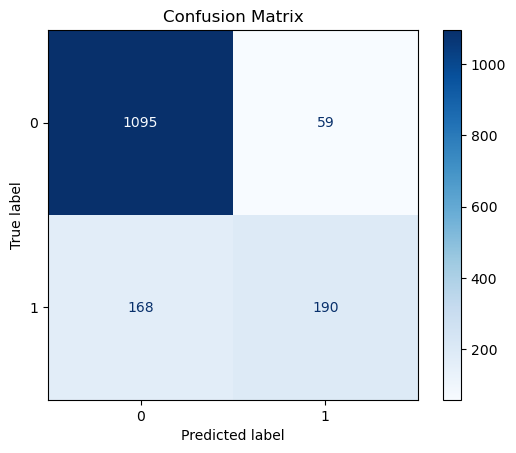

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Plot confusion matrix with color map
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


Exercise 14. Extract the feature importances

In [26]:
# Extract feature importances from the best Random Forest classifier
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

print("Feature importances:")
print(feature_importances)


Feature importances:
[0.0402202  0.04200293 0.0279288  0.03546822 0.08142516 0.04984566
 0.03110044 0.03156475 0.03778801 0.1148863  0.08438292 0.09296535
 0.02203808 0.037086   0.03968754 0.04813546 0.00570676 0.00644958
 0.00548426 0.00097485 0.00110275 0.00044529 0.00696487 0.00100733
 0.00255548 0.0039948  0.00210392 0.00331239 0.00095053 0.00278279
 0.00334215 0.00405828 0.00386829 0.00218412 0.00393854 0.00130521
 0.00220067 0.00051048 0.00757889 0.00274402 0.00330405 0.00307231
 0.001943   0.00177304 0.00078354 0.00141089 0.0018511  0.00338925
 0.0036631  0.00259381 0.00344018 0.00067    0.00145753 0.00032555
 0.0051771  0.00220979 0.00310945 0.00371857 0.00353648 0.0042509
 0.00100135 0.00337892 0.00394152 0.00351904 0.00244479 0.0034958
 0.00311276 0.00716235 0.00550163 0.00597073 0.00625345 0.00524166
 0.00520431]


Exercise 15. Update the pipeline and the parameter grid

In [27]:
from sklearn.linear_model import LogisticRegression

# Replace RandomForestClassifier with LogisticRegression in the pipeline
pipeline.set_params(classifier=LogisticRegression(random_state=42))

# Update the estimator inside GridSearchCV to the new pipeline
grid_search.estimator = pipeline

# Define new parameter grid for Logistic Regression
param_grid = {
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

# Update the grid_search parameter grid
grid_search.param_grid = param_grid

# Fit the updated grid search with Logistic Regression
model = grid_search.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Print first few predictions to verify
print(y_pred[:10])


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No